In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


file_path = '/content/drive/My Drive/Advance_Project/startup_data.csv'
startup_data = pd.read_csv(file_path, encoding='ISO-8859-1')
dataset_shape = startup_data.shape
data_types = startup_data.dtypes
head_data = startup_data.head()
print("Dataset Shape:", dataset_shape)
print("\nData Types:\n", data_types)
print("\nFirst few rows:\n", head_data)
columns_list = startup_data.columns.tolist()
startup_data.columns = startup_data.columns.str.strip()
columns_list, startup_data.columns.tolist()

print("Columns List:", columns_list)
print("Startup Data Preview:\n", startup_data)

Mounted at /content/drive
Dataset Shape: (28031, 40)

Data Types:
 permalink                object
name                     object
homepage_url             object
category_list            object
 market                  object
 funding_total_usd        int64
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds            int64
founded_at               object
age                     float64
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                      int64
venture                   int64
equity_crowdfunding       int64
undisclosed               int64
convertible_note          int64
debt_financing            int64
angel                     int64
grant                     int64
private_equity            int64
post_ipo_equity           int64
post_

In [3]:
missing_data_before = startup_data.isnull().sum()
missing_percentage_before = (startup_data.isnull().mean()) * 100
startup_data.columns = startup_data.columns.str.strip()
startup_data['funding_total_usd'] = startup_data['funding_total_usd'].replace({',': ''}, regex=True)
startup_data['funding_total_usd'] = pd.to_numeric(startup_data['funding_total_usd'], errors='coerce')
startup_data['founded_at'] = pd.to_datetime(startup_data['founded_at'], errors='coerce')
startup_data['first_funding_at'] = pd.to_datetime(startup_data['first_funding_at'], errors='coerce')
startup_data['last_funding_at'] = pd.to_datetime(startup_data['last_funding_at'], errors='coerce')
startup_data['age'] = pd.to_numeric(startup_data['age'], errors='coerce')

duplicates_before = startup_data.duplicated().sum()
startup_data_cleaned = startup_data.drop_duplicates()
duplicates_after = startup_data_cleaned.duplicated().sum()
data_types_after = startup_data_cleaned.dtypes
dataset_shape_before = startup_data.shape
dataset_shape_after = startup_data_cleaned.shape

print("Missing Data (Before Cleaning):\n", missing_data_before)
print("\nMissing Percentage (Before Cleaning):\n", missing_percentage_before)
print("\nMissing Data (After Cleaning):\n", startup_data_cleaned.isnull().sum())
print("\nMissing Percentage (After Cleaning):\n", (startup_data_cleaned.isnull().mean()) * 100)
print("\nDuplicates (Before Cleaning):", duplicates_before)
print("Duplicates (After Cleaning):", duplicates_after)
print("\nData Types (After Cleaning):\n", data_types_after)
print("\nDataset Shape (Before Cleaning):", dataset_shape_before)
print("Dataset Shape (After Cleaning):", dataset_shape_after)




Missing Data (Before Cleaning):
 permalink                  0
name                       0
homepage_url               0
category_list              0
market                     2
funding_total_usd          0
status                     0
country_code               0
state_code              8018
region                     0
city                       0
funding_rounds             0
founded_at                 0
age                        1
founded_month             52
founded_quarter           52
founded_year              52
first_funding_at           0
last_funding_at            0
seed                       0
venture                    0
equity_crowdfunding        0
undisclosed                0
convertible_note           0
debt_financing             0
angel                      0
grant                      0
private_equity             0
post_ipo_equity            0
post_ipo_debt              0
secondary_market           0
product_crowdfunding       0
round_A                    0
round_B   

In [4]:
numeric_columns = startup_data_cleaned.select_dtypes(include=['int64', 'float64'])
stats = numeric_columns.describe().T
stats['sum'] = numeric_columns.sum()
stats['std'] = numeric_columns.std()
stats = stats.rename(columns={
    'min': 'Minimum',
    'max': 'Maximum',
    'mean': 'Average',
    'std': 'Standard Deviation',
    'sum': 'Total'
})
print("Statistics for numeric columns:\n")
print(stats[['Minimum', 'Maximum', 'Total', 'Standard Deviation', 'Average']])

Statistics for numeric columns:

                          Minimum       Maximum         Total  \
funding_total_usd       30.000000  3.007950e+10  4.997584e+11   
funding_rounds           1.000000  1.800000e+01  5.625300e+04   
age                      9.968515  2.223354e+02  5.010228e+05   
founded_year          1902.000000  2.014000e+03  5.615568e+07   
seed                     0.000000  1.000000e+08  8.521288e+09   
venture                  0.000000  2.351000e+09  2.985570e+11   
equity_crowdfunding      0.000000  1.700000e+07  2.119973e+08   
undisclosed              0.000000  2.508000e+08  2.949751e+09   
convertible_note         0.000000  3.000000e+08  8.901795e+08   
debt_financing           0.000000  3.007950e+10  7.380482e+10   
angel                    0.000000  3.025439e+07  2.433747e+09   
grant                    0.000000  7.505000e+08  6.268493e+09   
private_equity           0.000000  3.500000e+09  7.657657e+10   
post_ipo_equity          0.000000  4.700000e+09  2.005571


# ***Visualization***

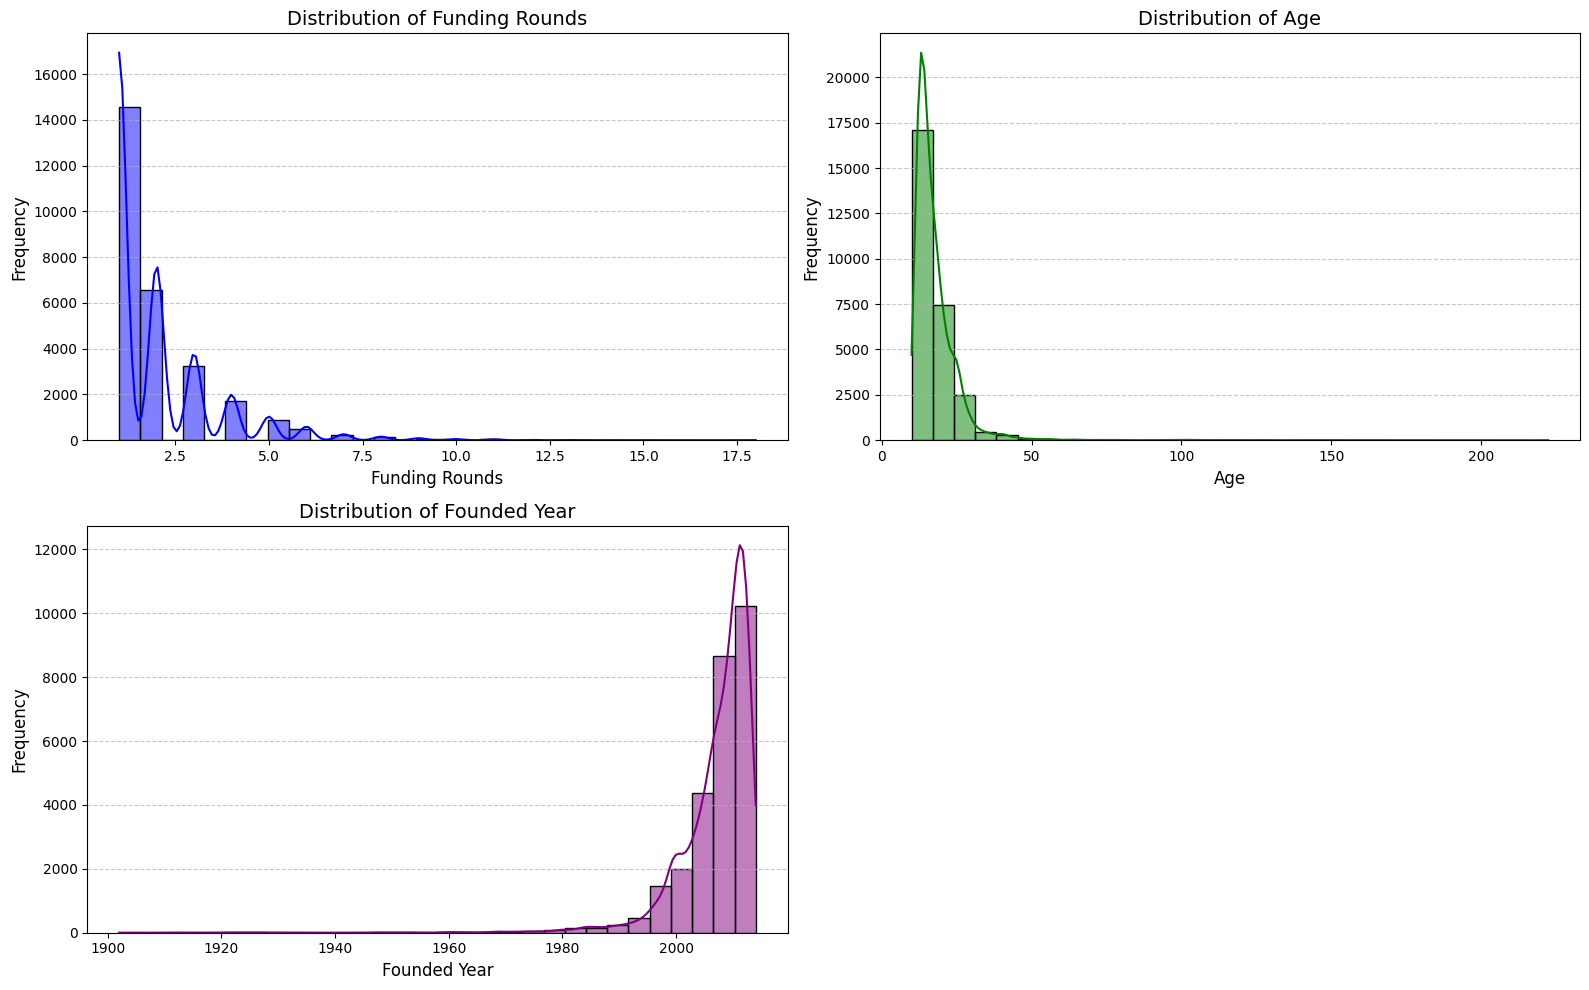

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
sns.histplot(startup_data_cleaned['funding_rounds'], kde=True, bins=30, color="blue", edgecolor="black", ax=axes[0])
axes[0].set_title("Distribution of Funding Rounds", fontsize=14)
axes[0].set_xlabel("Funding Rounds", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(startup_data_cleaned['age'], kde=True, bins=30, color="green", edgecolor="black", ax=axes[1])
axes[1].set_title("Distribution of Age", fontsize=14)
axes[1].set_xlabel("Age", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(startup_data_cleaned['founded_year'], kde=True, bins=30, color="purple", edgecolor="black", ax=axes[2])
axes[2].set_title("Distribution of Founded Year", fontsize=14)
axes[2].set_xlabel("Founded Year", fontsize=12)
axes[2].set_ylabel("Frequency", fontsize=12)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

fig.delaxes(axes[3])
plt.tight_layout()
plt.show()


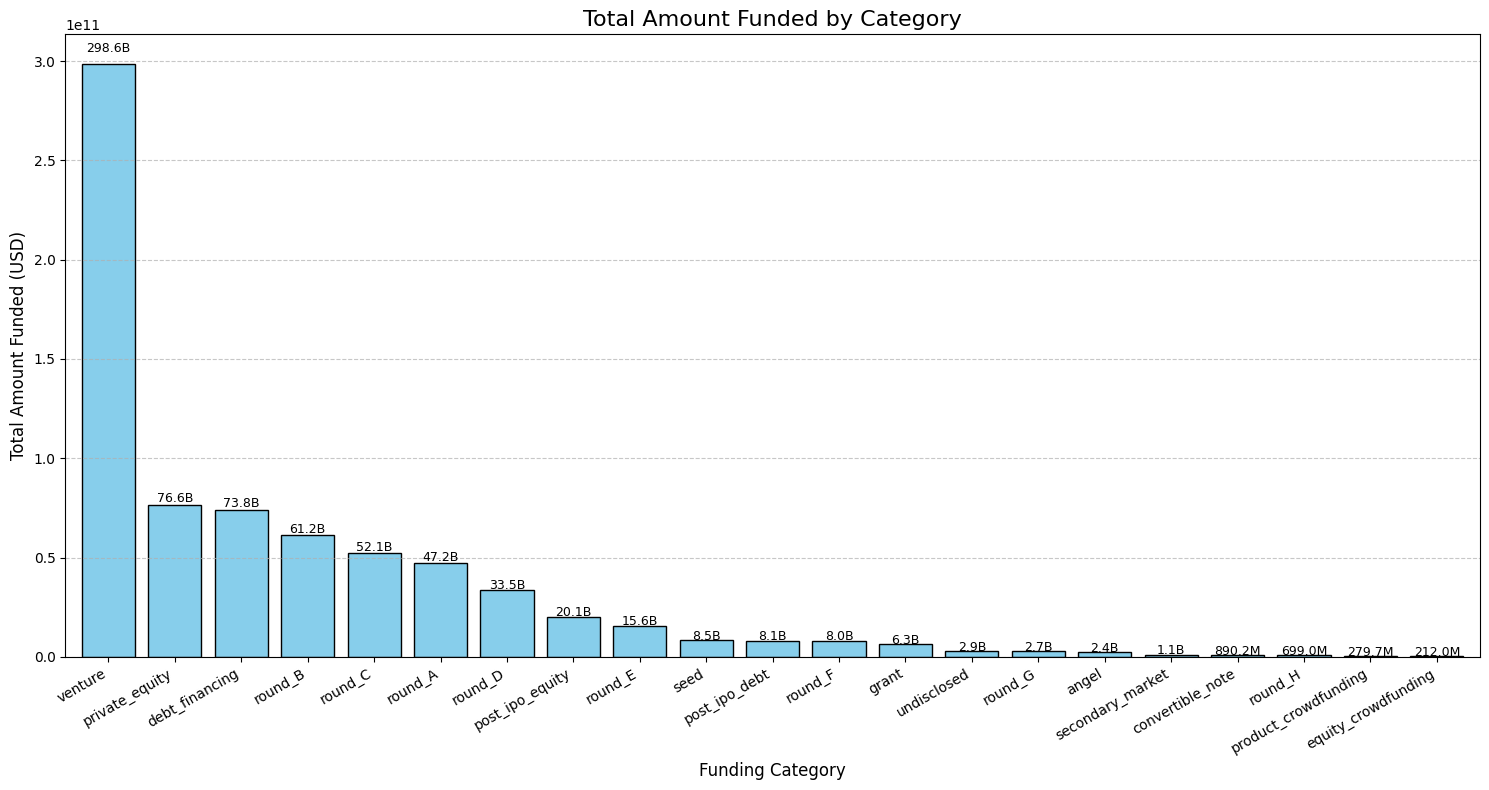

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

funding_columns = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing',
    'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt',
    'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C',
    'round_D', 'round_E', 'round_F', 'round_G', 'round_H'
]
funding_columns = [col for col in funding_columns if col in startup_data_cleaned.columns]
total_funding = startup_data_cleaned[funding_columns].sum()
plt.figure(figsize=(15, 8))
bars = total_funding.sort_values(ascending=False)
bar_plot = bars.plot(kind='bar', color='skyblue', edgecolor='black', width=0.8)
for i, value in enumerate(bars):
    if value >= 1000000000:
        label = f'{value / 1000000000:.1f}B'
    elif value >= 1000000:
        label = f'{value / 1000000:.1f}M'
    else:
        label = f'{value:.1f}'
    plt.text(i, value + (0.02 * value), label, ha='center', fontsize=9)
plt.title("Total Amount Funded by Category", fontsize=16)
plt.xlabel("Funding Category", fontsize=12)
plt.ylabel("Total Amount Funded (USD)", fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

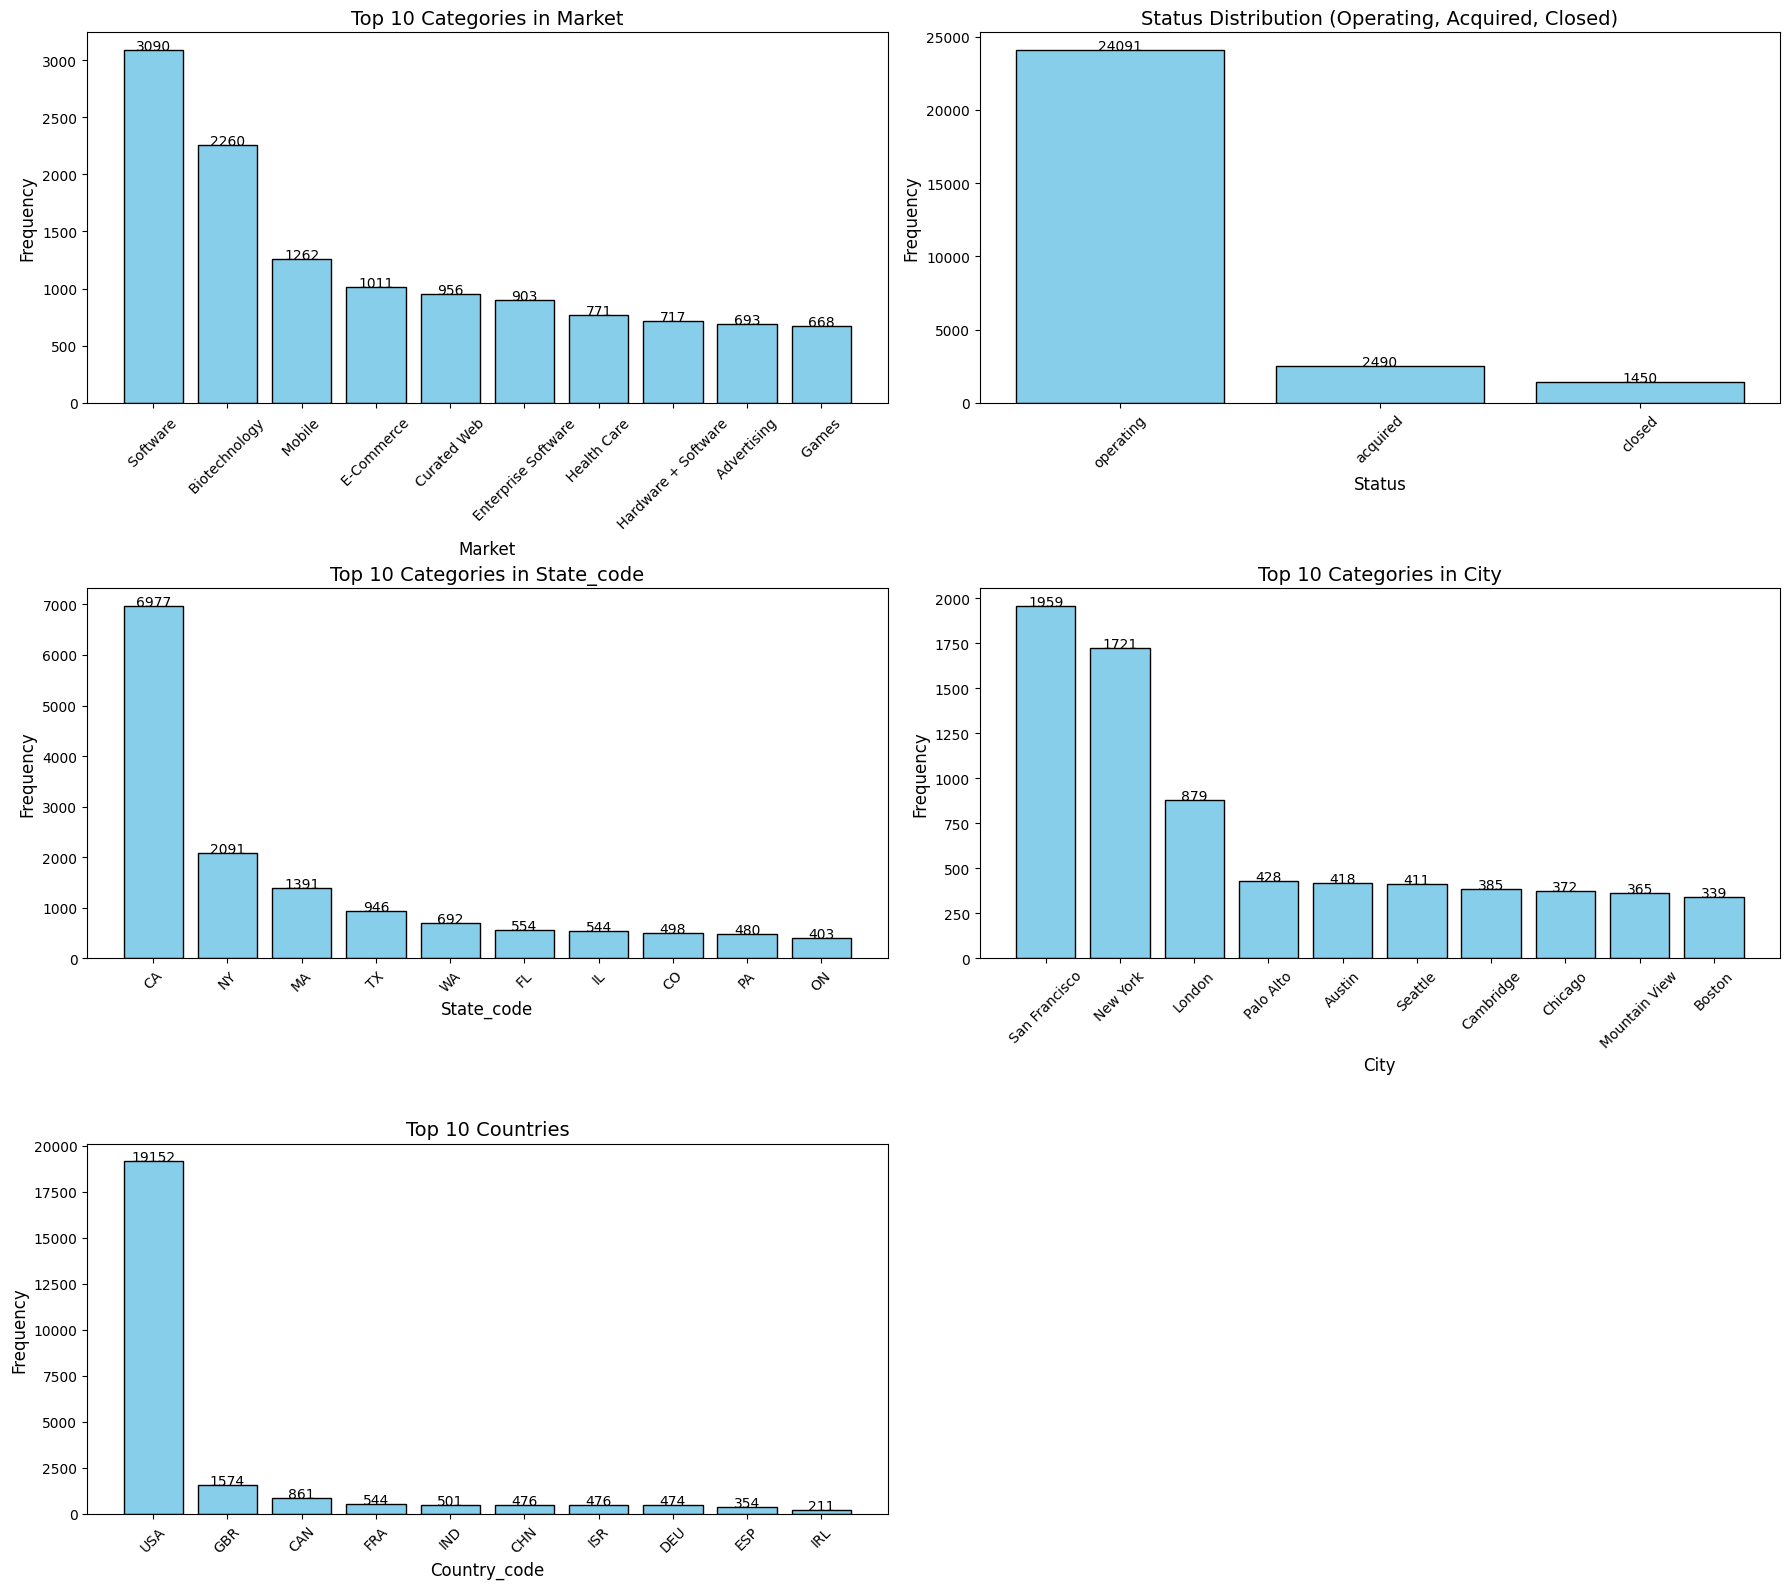

In [7]:
import matplotlib.pyplot as plt
categorical_columns = ['market', 'status', 'state_code', 'city', 'country_code']
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    top_10 = startup_data_cleaned[col].value_counts().head(10)
    axes[i].bar(top_10.index, top_10.values, color='skyblue', edgecolor='black', width=0.8)
    if col == 'status':
        title = "Status Distribution (Operating, Acquired, Closed)"
    elif col == 'country_code':
        title = "Top 10 Countries"
    else:
        title = f"Top 10 Categories in {col.capitalize()}"
    axes[i].set_title(title, fontsize=14)
    axes[i].set_xlabel(col.capitalize(), fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    for x, y in enumerate(top_10.values):
        axes[i].text(x, y + 0.5, f'{y}', ha='center', fontsize=10, color='black')
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


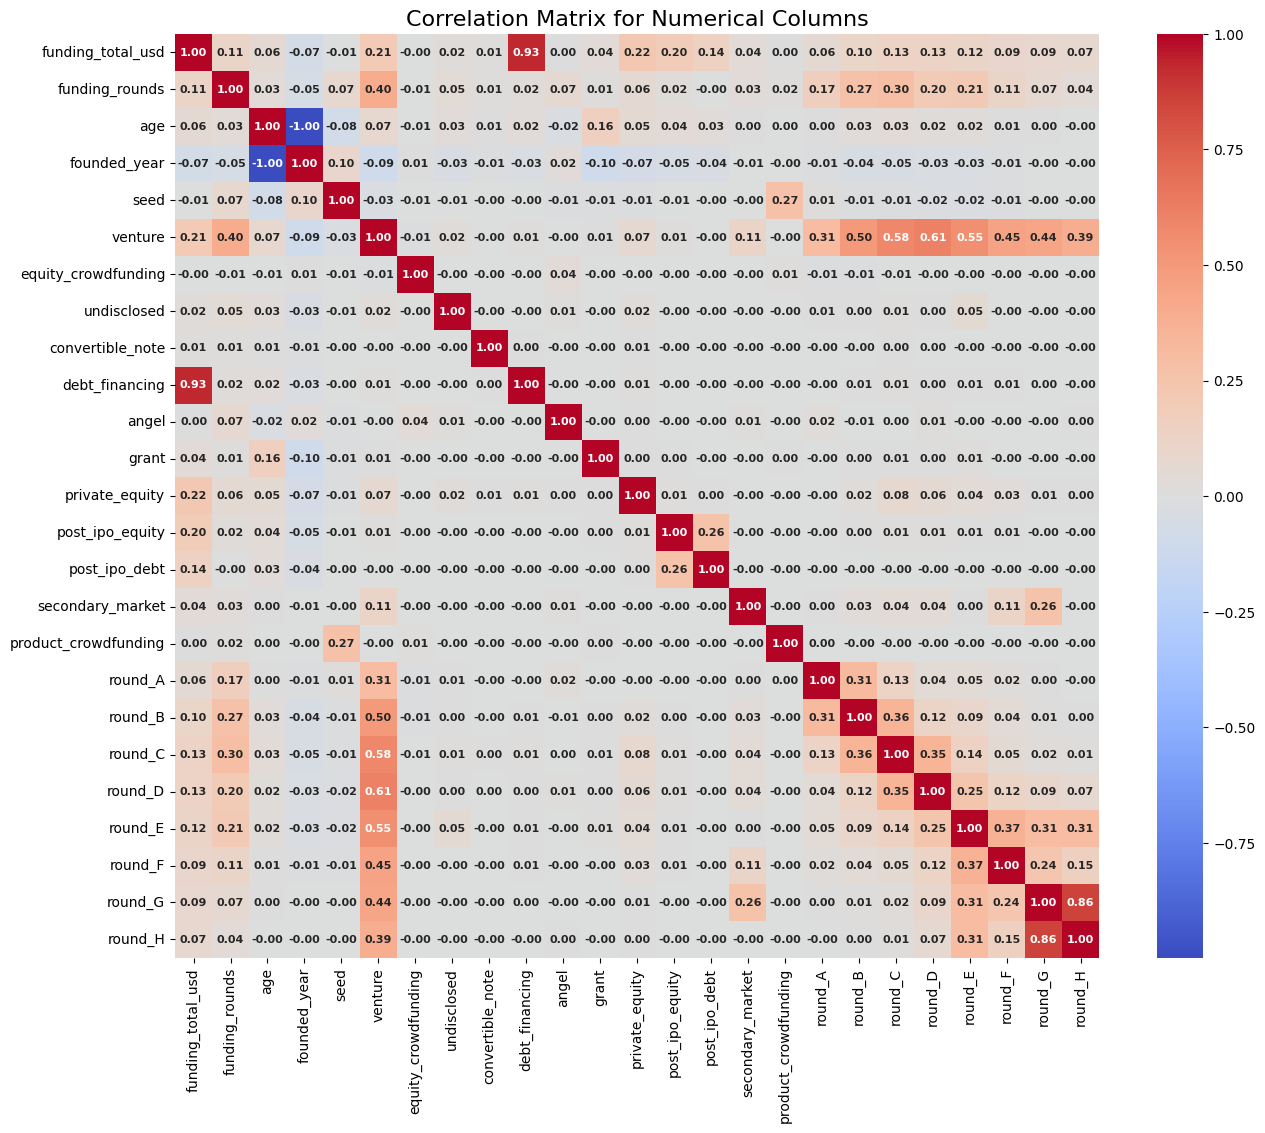

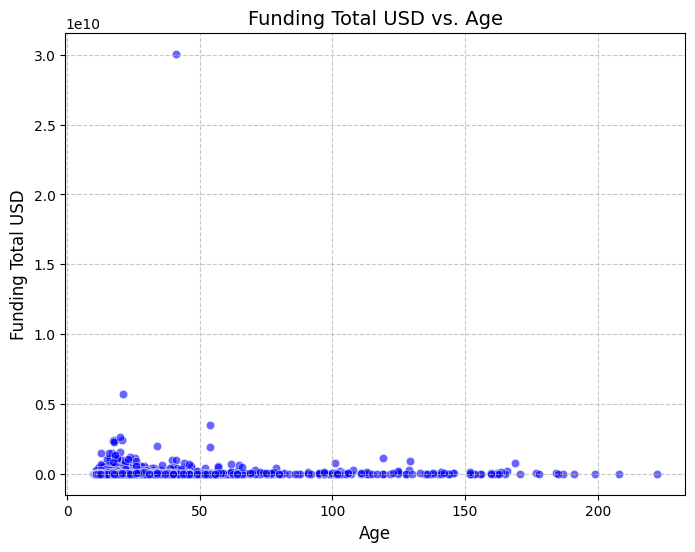

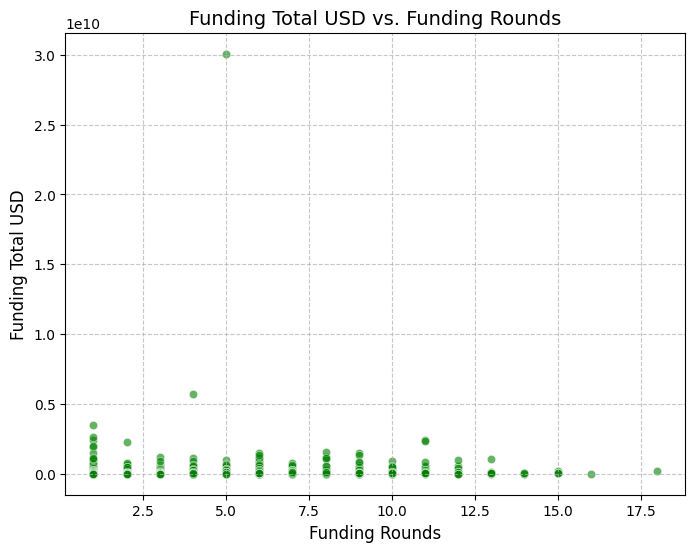

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = startup_data_cleaned.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = startup_data_cleaned[numerical_columns].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    annot_kws={"size": 8, "weight": "bold"},
)
plt.title("Correlation Matrix for Numerical Columns", fontsize=16)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=startup_data_cleaned, x='age', y='funding_total_usd', color='blue', alpha=0.6)
plt.title("Funding Total USD vs. Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Funding Total USD", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=startup_data_cleaned, x='funding_rounds', y='funding_total_usd', color='green', alpha=0.6)
plt.title("Funding Total USD vs. Funding Rounds", fontsize=14)
plt.xlabel("Funding Rounds", fontsize=12)
plt.ylabel("Funding Total USD", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

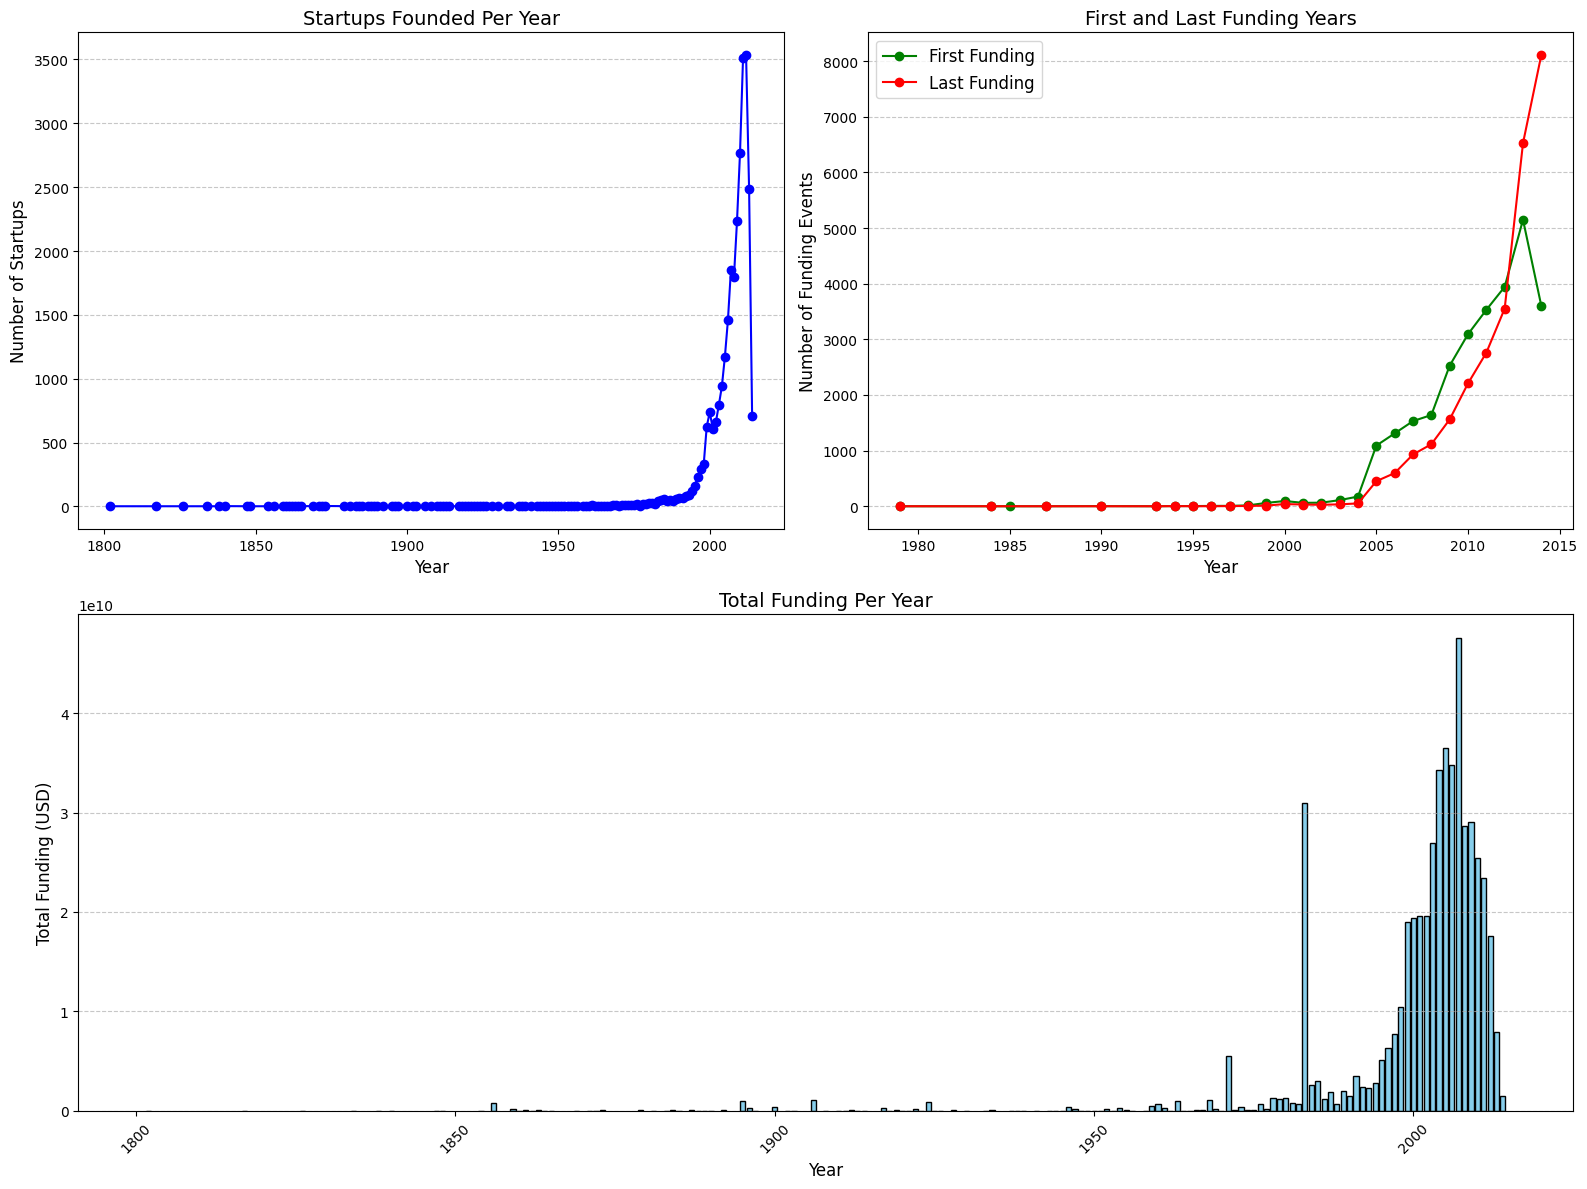

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

startup_data['founded_at'] = pd.to_datetime(startup_data['founded_at'], errors='coerce')
startup_data['first_funding_at'] = pd.to_datetime(startup_data['first_funding_at'], errors='coerce')
startup_data['last_funding_at'] = pd.to_datetime(startup_data['last_funding_at'], errors='coerce')

startup_data['founded_year'] = startup_data['founded_at'].dt.year
startup_data['first_funding_year'] = startup_data['first_funding_at'].dt.year
startup_data['last_funding_year'] = startup_data['last_funding_at'].dt.year

founded_counts = startup_data['founded_year'].value_counts().sort_index()
funding_per_year = startup_data.groupby('founded_year')['funding_total_usd'].sum()
first_funding_counts = startup_data['first_funding_year'].value_counts().sort_index()
last_funding_counts = startup_data['last_funding_year'].value_counts().sort_index()

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(founded_counts.index, founded_counts.values, marker='o', linestyle='-', color='blue')
ax1.set_title("Startups Founded Per Year", fontsize=14)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Number of Startups", fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(first_funding_counts.index, first_funding_counts.values, marker='o', label="First Funding", color='green')
ax2.plot(last_funding_counts.index, last_funding_counts.values, marker='o', label="Last Funding", color='red')
ax2.set_title("First and Last Funding Years", fontsize=14)
ax2.set_xlabel("Year", fontsize=12)
ax2.set_ylabel("Number of Funding Events", fontsize=12)
ax2.legend(fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

ax3 = fig.add_subplot(2, 1, 2)
ax3.bar(funding_per_year.index, funding_per_year.values, color='skyblue', edgecolor='black')
ax3.set_title("Total Funding Per Year", fontsize=14)
ax3.set_xlabel("Year", fontsize=12)
ax3.set_ylabel("Total Funding (USD)", fontsize=12)
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

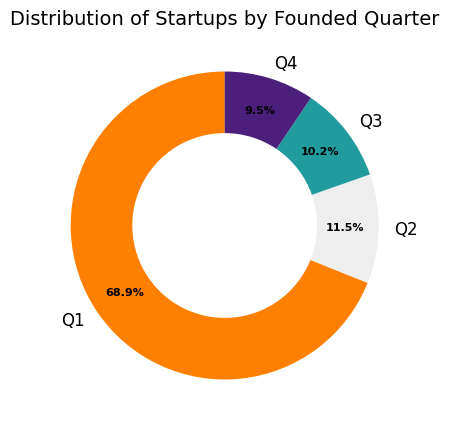

In [10]:
import matplotlib.pyplot as plt

founded_quarter_counts = startup_data_cleaned['founded_quarter'].value_counts()
custom_colors = ['#FF8000', '#EEEEEE', '#219B9D', '#4C1F7A']
plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(
    founded_quarter_counts,
    labels=founded_quarter_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_colors,
    wedgeprops={'width': 0.4}
)
for autotext, text in zip(autotexts, texts):
    autotext.set_fontsize(8)
    autotext.set_color("black")
    autotext.set_fontweight("bold")
    x, y = autotext.get_position()
    autotext.set_position((x * 1.3, y * 1.3))
for text in texts:
    text.set_fontsize(12)
plt.title("Distribution of Startups by Founded Quarter", fontsize=14)
plt.show()

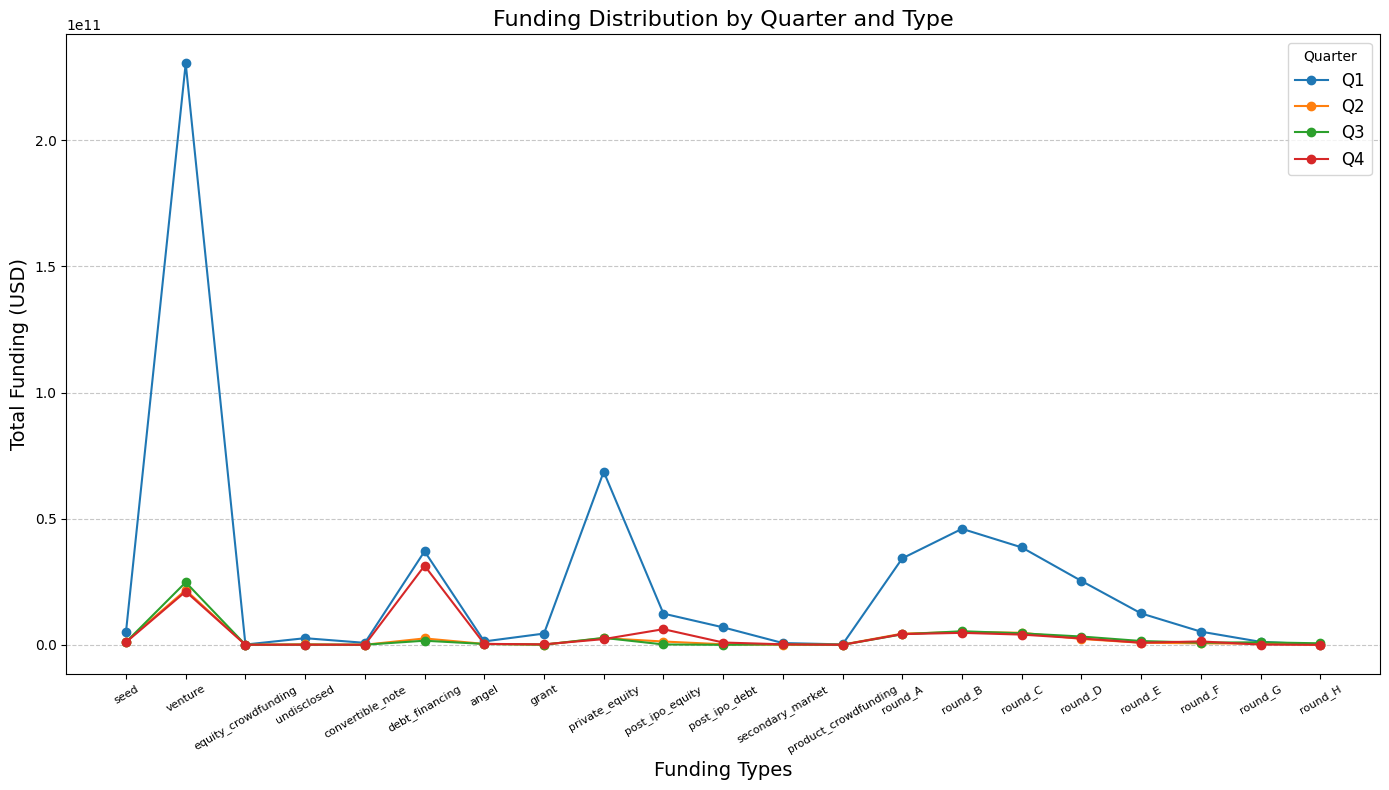

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

funding_types = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
    'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'
]
funding_by_quarter = startup_data_cleaned.groupby('founded_quarter')[funding_types].sum()
funding_types = [col for col in funding_types if col in funding_by_quarter.columns]
funding_by_quarter_cleaned = funding_by_quarter[funding_types]
plt.figure(figsize=(14, 8))
for quarter in funding_by_quarter_cleaned.index:
    plt.plot(
        funding_types,
        funding_by_quarter_cleaned.loc[quarter],
        marker='o',
        label=f'{quarter}'
    )
plt.title("Funding Distribution by Quarter and Type", fontsize=16)
plt.xlabel("Funding Types", fontsize=14)
plt.ylabel("Total Funding (USD)", fontsize=14)
plt.xticks(rotation=30, fontsize=8)
plt.legend(title="Quarter", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

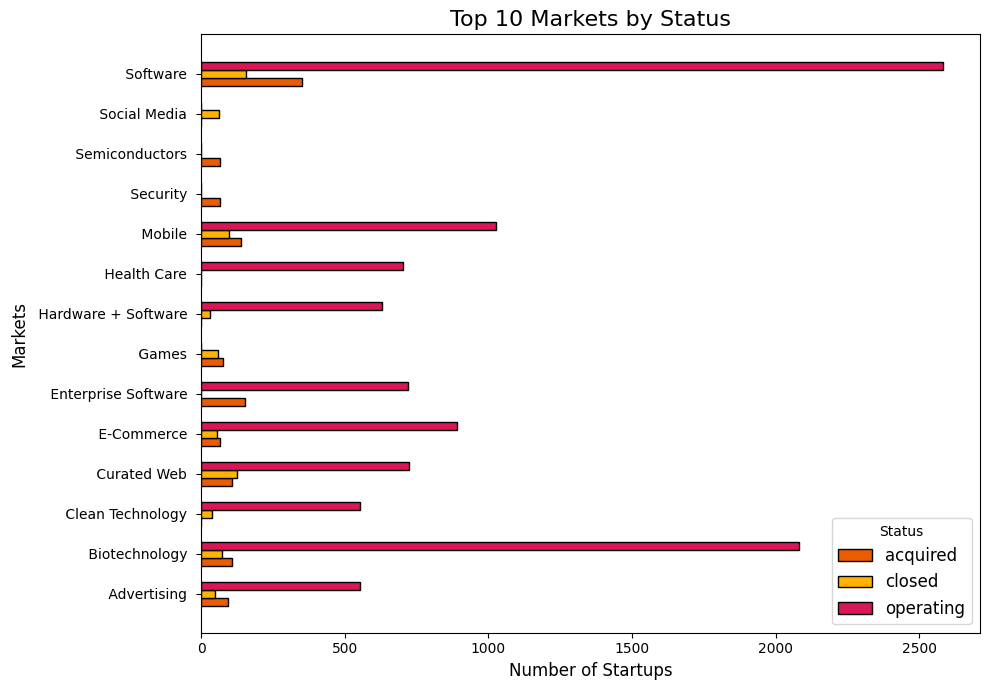

In [12]:
import matplotlib.pyplot as plt

status_market_group = startup_data_cleaned.groupby(['status', 'market'])['status'].count().reset_index(name='count')
top_markets_by_status = pd.DataFrame()
for status in status_market_group['status'].unique():
    top_10 = status_market_group[status_market_group['status'] == status].nlargest(10, 'count')
    top_markets_by_status = pd.concat([top_markets_by_status, top_10], ignore_index=True)
statuses = ['acquired', 'closed', 'operating']
pivot_data = top_markets_by_status.pivot(index='market', columns='status', values='count').fillna(0)
colors = {'acquired': '#EB5B00', 'closed': '#FFB200', 'operating': '#D91656'}
plt.figure(figsize=(10, 7))
bar_width = 0.2
y_positions = range(len(pivot_data))
for i, status in enumerate(statuses):
    plt.barh(
        [y + i * bar_width for y in y_positions],
        pivot_data[status],
        height=bar_width,
        color=colors[status],
        edgecolor='black',
        label=status
    )
plt.xlabel("Number of Startups", fontsize=12)
plt.ylabel("Markets", fontsize=12)
plt.title("Top 10 Markets by Status", fontsize=16)
plt.yticks([y + bar_width for y in y_positions], pivot_data.index, fontsize=10)
plt.legend(title="Status", fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
!pip install optuna lightgbm xgboost catboost imbalanced-learn tensorflow


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import optuna
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Advance_Project/startup_data.csv', encoding='latin1')
df = df.drop(columns=['permalink', 'homepage_url', 'state_code'], errors='ignore')
df.columns = df.columns.str.strip()

for col in ['first_funding_at', 'last_funding_at']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

categorical_columns = ['market', 'founded_month', 'founded_quarter']
numerical_columns = ['age', 'founded_year', 'funding_total_usd', 'funding_rounds','seed', 'venture', 'equity_crowdfunding', 'angel', 'private_equity']

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

for col in numerical_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

df['funding_per_round'] = df['funding_total_usd'] / (df['funding_rounds'] + 1)
df['years_since_founding'] = 2025 - df['founded_year']
df['funding_round_intensity'] = df['funding_rounds'] / (df['years_since_founding'] + 1)
df['log_funding'] = np.log1p(df['funding_total_usd'])
df['funding_gap'] = (df['last_funding_at'].dt.year - df['first_funding_at'].dt.year).fillna(0)
df['funding_gap'] = df['funding_gap'].replace(np.inf, 0)

df['has_seed_funding'] = (df['seed'] > 0).astype(int)
df['has_venture_funding'] = (df['venture'] > 0).astype(int)
df['has_equity_crowdfunding'] = (df['equity_crowdfunding'] > 0).astype(int)
df['has_angel_investment'] = (df['angel'] > 0).astype(int)
df['has_private_equity'] = (df['private_equity'] > 0).astype(int)

df = pd.get_dummies(df, columns=['market', 'country_code', 'status'], drop_first=True)

median_funding_gap = df['funding_gap'].median()
median_funding_total = df['funding_total_usd'].median()
median_funding_per_round = df['funding_per_round'].median()

df['is_success'] = (
    ((df.get('status_operating', 0) == 1) | (df.get('status_acquired', 0) == 1)) &
    (df['funding_gap'] <= median_funding_gap) &
    (df['funding_total_usd'] >= median_funding_total) &
    (df['funding_per_round'] >= median_funding_per_round)
).astype(int)

selected_features = [
    'funding_rounds', 'age', 'years_since_founding', 'funding_round_intensity', 'log_funding',
    'has_seed_funding', 'has_venture_funding', 'has_equity_crowdfunding',
    'has_angel_investment', 'has_private_equity'
]

X = df[selected_features].fillna(0)
y = df['is_success']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
X_selected = selector.fit_transform(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train_resampled, y_train_resampled)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)
best_xgb_params = study.best_params

xgb_model = xgb.XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='logloss')
rf_model = RandomForestClassifier(n_estimators=300, max_depth=15)
lgb_model = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=15)
cat_model = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=10, verbose=0)
gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=15)
et_model = ExtraTreesClassifier(n_estimators=300, max_depth=15)
logistic_model = LogisticRegression(max_iter=1000)

stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model), ('cat', cat_model),
                ('gb', gb_model), ('et', et_model)],
    final_estimator=logistic_model
)

for model, name in zip(
    [xgb_model, rf_model, lgb_model, cat_model, gb_model, et_model, stacking_model],
    ['XGBoost', 'Random Forest', 'LightGBM', 'CatBoost', 'Gradient Boosting', 'Extra Trees', 'Stacking']
):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n======== {name} ========")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

y_all_pred = xgb_model.predict(X_selected)

success_count = np.sum(y_all_pred == 1)
failure_count = np.sum(y_all_pred == 0)

print(f"Predicted Successes: {success_count}")
print(f"Predicted Failures: {failure_count}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[I 2025-05-05 16:56:02,060] A new study created in memory with name: no-name-13b82428-04dc-4a67-843e-c122896290cd
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:56:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-05-05 16:56:04,013] Trial 0 finished with value: 0.9456037096486535 and parameters: {'n_estimators': 114, 'max_depth': 3, 'learning_rate': 0.19142912375883459, 'subsample': 0.5388094078104243, 'colsample_bytree': 0.9715582595645922}. Best is trial 0 with value: 0.9456037096486535.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:56:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-05-05 16:56:04,486] Trial 1 finished with value: 0.9443552701979668 and parameters: {'n_estimators': 196, 'max_depth': 3, 'learning_rate': 0.06933841979646, 'subsam


======== XGBoost ========
Accuracy: 0.9461
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4756
           1       0.78      0.91      0.84       851

    accuracy                           0.95      5607
   macro avg       0.88      0.93      0.90      5607
weighted avg       0.95      0.95      0.95      5607


======== Random Forest ========
Accuracy: 0.9469
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4756
           1       0.78      0.91      0.84       851

    accuracy                           0.95      5607
   macro avg       0.88      0.93      0.90      5607
weighted avg       0.95      0.95      0.95      5607

[LightGBM] [Info] Number of positive: 19021, number of negative: 19021
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] T

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



======== LightGBM ========
Accuracy: 0.9440
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4756
           1       0.77      0.90      0.83       851

    accuracy                           0.94      5607
   macro avg       0.88      0.93      0.90      5607
weighted avg       0.95      0.94      0.95      5607


======== CatBoost ========
Accuracy: 0.9447
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4756
           1       0.77      0.91      0.83       851

    accuracy                           0.94      5607
   macro avg       0.88      0.93      0.90      5607
weighted avg       0.95      0.94      0.95      5607


======== Gradient Boosting ========
Accuracy: 0.9363
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      4756
           1       0.75      0.87      0.81       851

    accuracy                          

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:58:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19021, number of negative: 19021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1153
[LightGBM] [Info] Number of data points in the train set: 38042, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:01:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:01:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15216, number of negative: 15217
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1151
[LightGBM] [Info] Number of data points in the train set: 30433, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499984 -> initscore=-0.000066
[LightGBM] [Info] Start training from score -0.000066


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15217, number of negative: 15216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1126
[LightGBM] [Info] Number of data points in the train set: 30433, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500016 -> initscore=0.000066
[LightGBM] [Info] Start training from score 0.000066


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15217, number of negative: 15217
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 30434, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15217, number of negative: 15217
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1131
[LightGBM] [Info] Number of data points in the train set: 30434, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 15217, number of negative: 15217
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 30434, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



======== Stacking ========
Accuracy: 0.9470
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4756
           1       0.78      0.90      0.84       851

    accuracy                           0.95      5607
   macro avg       0.88      0.93      0.90      5607
weighted avg       0.95      0.95      0.95      5607

Predicted Successes: 5050
Predicted Failures: 22981
